# Load the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bob_ross = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-02-21/bob_ross.csv')

In [ ]:
bob_ross.head()

,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,...,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,282,https://www.twoinchbrush.com/images/painting28...,A Walk in the Woods,1,1,8,https://www.youtube.com/embed/oh5p5f5_-7A,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
1,283,https://www.twoinchbrush.com/images/painting28...,Mt. McKinley,1,2,8,https://www.youtube.com/embed/RInDWhYceLU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
2,284,https://www.twoinchbrush.com/images/painting28...,Ebony Sunset,1,3,9,https://www.youtube.com/embed/UOziR7PoVco,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '...",True,...,False,False,False,True,True,True,True,True,False,True
3,285,https://www.twoinchbrush.com/images/painting28...,Winter Mist,1,4,3,https://www.youtube.com/embed/0pwoixRikn4,"['Prussian Blue', 'Titanium White', 'Van Dyke ...","['#021E44', '#FFFFFF', '#221B15']",False,...,False,False,False,False,True,False,True,True,False,False
4,286,https://www.twoinchbrush.com/images/painting28...,Quiet Stream,1,5,8,https://www.youtube.com/embed/DFSIQNjKRfk,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True


In [ ]:
bob_ross.shape, bob_ross.columns[:15]

((403, 27),
 Index(['painting_index', 'img_src', 'painting_title', 'season', 'episode',
        'num_colors', 'youtube_src', 'colors', 'color_hex', 'Black_Gesso',
        'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna',
        'Indian_Red'],
       dtype='object'))

In [ ]:
bob_ross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   painting_index    403 non-null    int64 
 1   img_src           403 non-null    object
 2   painting_title    403 non-null    object
 3   season            403 non-null    int64 
 4   episode           403 non-null    int64 
 5   num_colors        403 non-null    int64 
 6   youtube_src       403 non-null    object
 7   colors            403 non-null    object
 8   color_hex         403 non-null    object
 9   Black_Gesso       403 non-null    bool  
 10  Bright_Red        403 non-null    bool  
 11  Burnt_Umber       403 non-null    bool  
 12  Cadmium_Yellow    403 non-null    bool  
 13  Dark_Sienna       403 non-null    bool  
 14  Indian_Red        403 non-null    bool  
 15  Indian_Yellow     403 non-null    bool  
 16  Liquid_Black      403 non-null    bool  
 17  Liquid_Clear    

# **Project M1**

## EDA 1: Overall structure exploration - what is the distribution of color usage?

The initial structural analysis examines the usage of all colors in Bob Ross's paintings, aiming to determine whether there exists a discernible variation in color frequency when no other conditions are applied.

In [ ]:
# Some color labels include non-standard characters, but each color appears consistently with the same label, so the frequency counts  are not affected by duplicate representations.
colors_exploded = (
    bob_ross["colors"]
    .astype(str)
    .str.strip("[]")
    .str.replace("'", "", regex=False)
    .str.split(",")
    .explode()
    .str.strip() # remove spaces
)

color_counts = colors_exploded.value_counts()
top_n = 15
top_colors = color_counts.head(top_n)

top_colors

,count
colors,
Titanium White,400
Alizarin Crimson,380
Van Dyke Brown,371
Cadmium Yellow,346
Yellow Ochre,327
Phthalo Blue,323
Bright Red,321
Midnight Black\r\n\r\n,317
Sap Green,306


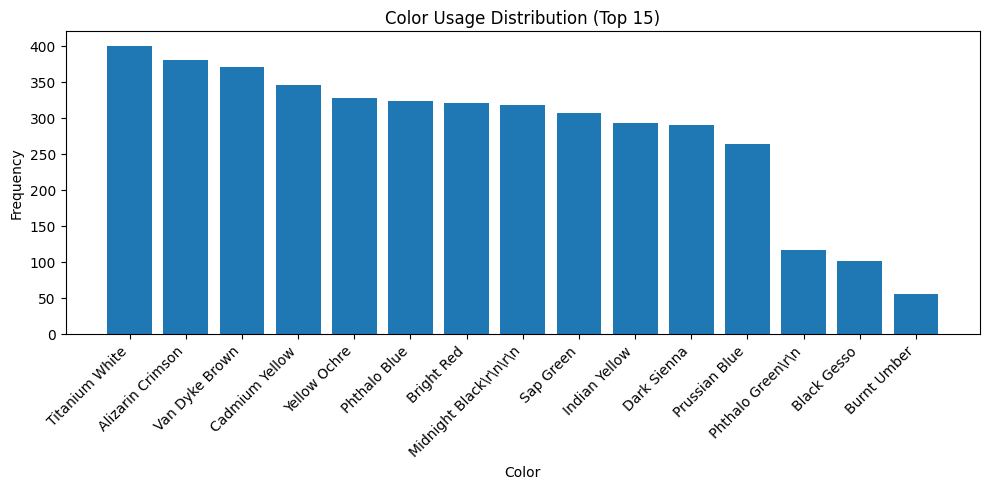

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(top_colors.index, top_colors.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Frequency")
plt.xlabel("Color")
plt.title("Color Usage Distribution (Top 15)")
plt.tight_layout()
plt.show()

Summary: Titanium White appears in about 400 out of 403 paintings, followed by Alizarin Crimson and Van Dyke Brown (each used in over 90% of paintings), while most other colors drop sharply in frequency, indicating a small, stable core palette with a long tail of auxiliary colors.

## EDA 2: Distribution of Color Usage Across Paintings

### 2.1 Are there clear differences in usage frequency across colors?

This EDA analyzes the frequency with which individual colors appear across paintings to distinguish core palette colors from more variable stylistic choices. By examining binary color usage indicators, we gain an initial understanding of the structural foundations of Bob Ross’s visual style.

In [ ]:
# Select all binary color indicator columns
color_cols = bob_ross.select_dtypes("bool").columns

# Compute the proportion of paintings that use each color
color_freq = bob_ross[color_cols].mean().sort_values(ascending=False)
color_freq.head(10)

,0
Titanium_White,0.992556
Alizarin_Crimson,0.942928
Van_Dyke_Brown,0.920596
Cadmium_Yellow,0.858561
Yellow_Ochre,0.811414
Phthalo_Blue,0.801489
Bright_Red,0.796526
Midnight_Black,0.786600
Sap_Green,0.759305
Indian_Yellow,0.724566


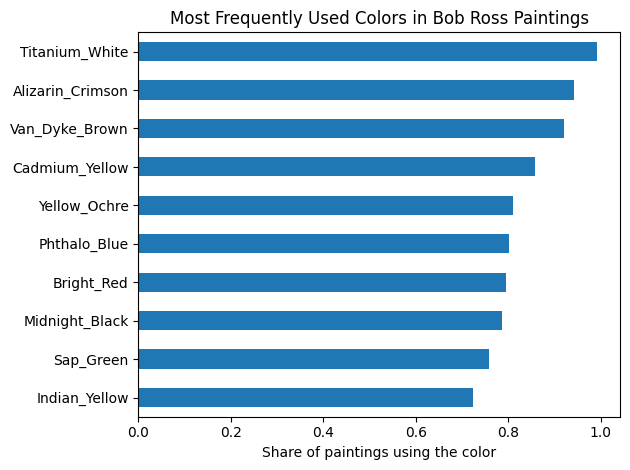

In [ ]:
# Visualize the top 10 most frequently used colors
plt.figure()
color_freq.head(10).sort_values().plot(kind="barh")
plt.xlabel("Share of paintings using the color")
plt.title("Most Frequently Used Colors in Bob Ross Paintings")
plt.tight_layout()
plt.show()

Summary: The results indicate that Bob Ross relies heavily on a small group of core colors, while other colors are used more selectively. This pattern suggests a consistent underlying palette with limited variation around it.

### 2.2 How many colors are usually used in paintings?

This analysis focuses on understanding how much visual complexity Bob Ross typically employs in a single painting, measured by the number of unique colors used. By examining the distribution of palette complexity, the goal is to assess whether most paintings follow a consistent level of complexity or whether there are distinct groups ranging from minimal to highly complex palettes.

In [ ]:
bob_ross["num_colors"].describe()

,num_colors
count,403.000000
mean,10.605459
std,2.378525
min,1.000000
25%,9.000000
50%,11.000000
75%,12.000000
max,15.000000


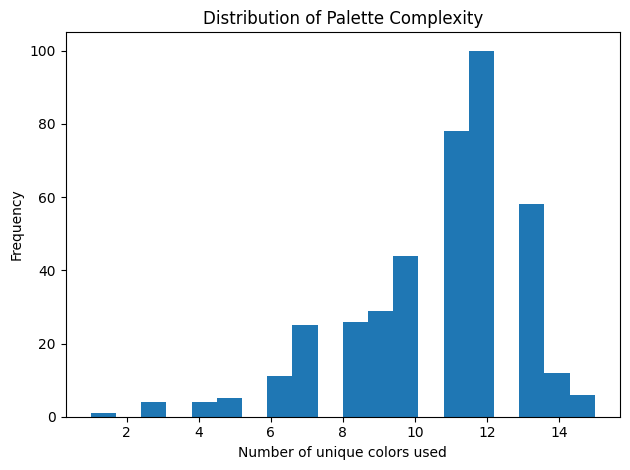

In [ ]:
# Visualize how many unique colors are typically used in a painting
plt.figure()
bob_ross["num_colors"].plot(kind="hist", bins=20)
plt.xlabel("Number of unique colors used")
plt.title("Distribution of Palette Complexity")
plt.tight_layout()
plt.show()

Summary: Most paintings use around 10-12 unique colors, with very few works using extremely small or very large palettes. This narrow concentration suggests that Bob Ross generally maintains a consistent level of palette complexity, with only occasional deviations.

## EDA 3: Explore the usage relationships among colors

### 3.1 Do paintings with a large number of colors use rare colors?

This analysis examines whether paintings with higher palette complexity rely more on rare colors. By analyzing how rare color usage changes as the number of colors increases, we aim to understand how palette complexity is constructed rather than imposed by arbitrary grouping.

In [ ]:
# Identify rare colors based on overall usage frequency
color_usage_rate = bob_ross[color_cols].mean()
rare_colors = color_usage_rate[color_usage_rate < 0.4].index

In [ ]:
# Count how many rare colors are used in each painting
bob_ross["num_rare_colors"] = bob_ross[rare_colors].sum(axis=1)

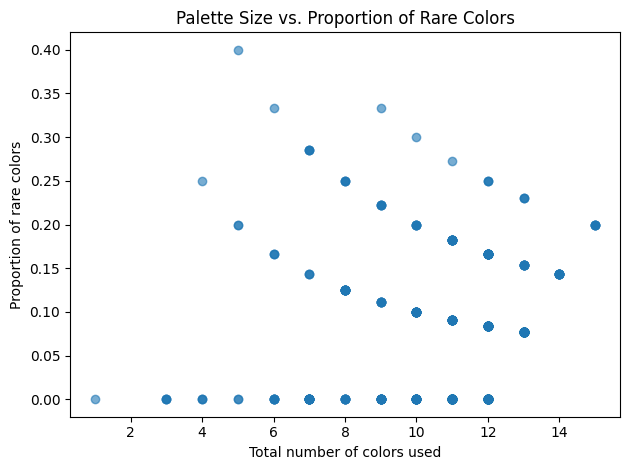

In [ ]:
bob_ross["rare_color_ratio"] = (
    bob_ross["num_rare_colors"] / bob_ross["num_colors"]
)

plt.figure()
plt.scatter(bob_ross["num_colors"], bob_ross["rare_color_ratio"], alpha=0.6)
plt.xlabel("Total number of colors used")
plt.ylabel("Proportion of rare colors")
plt.title("Palette Size vs. Proportion of Rare Colors")
plt.tight_layout()
plt.show()

Summary:
The scatter plot shows that as the total number of colors in a painting increases, the proportion of rare colors does not increase and instead tends to decline. Paintings with large palettes rely primarily on frequently used core colors, suggesting that palette complexity is achieved through recombining familiar colors rather than introducing many uncommon ones.

### 3.2 Co-occurrence Patterns Among Frequently Used Colors

This analysis examines how colors tend to appear together in Bob Ross paintings, rather than in isolation. By studying color co-occurrence patterns, the goal is to understand whether Bob Ross relied on stable, recurring color combinations that define his visual style, or whether palettes varied freely across paintings. Identifying consistent color pairings helps reveal implicit design rules behind the artwork - such as base colors that anchor compositions and accent colors that are selectively combined. This provides insight into the structure of artistic decision-making and helps distinguish intentional stylistic patterns from random color usage.

In [ ]:
# Compute a color co-occurrence matrix showing how often pairs of colors appear together in the same painting
top10_cols = color_freq.head(10).index
color_matrix = bob_ross[top10_cols].astype(int)
cooccur = color_matrix.T.dot(color_matrix)

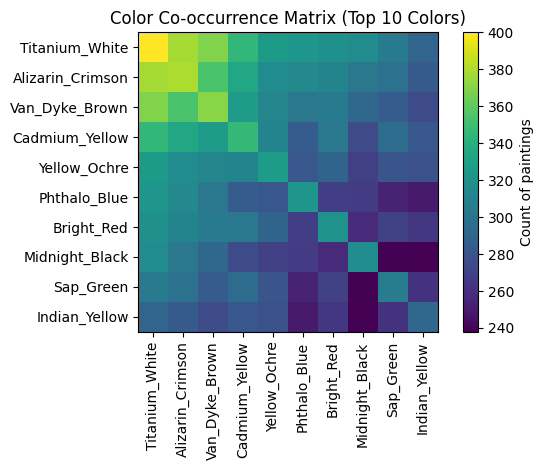

In [ ]:
# Visualize the color co-occurrence matrix to identify frequently paired colors across paintings
plt.figure()
plt.imshow(cooccur.values)
plt.xticks(range(len(top10_cols)), top10_cols, rotation=90)
plt.yticks(range(len(top10_cols)), top10_cols)
plt.title("Color Co-occurrence Matrix (Top 10 Colors)")
plt.colorbar(label="Count of paintings")
plt.tight_layout()
plt.show()

Summary: The co-occurrence matrix reveals clear relationships among core colors, with certain colors - such as Titanium White, Alizarin Crimson, and Van Dyke Brown - frequently appearing together. This indicates that color usage is structured, with stable combinations rather than independent or random selection.

## EDA 4: The influence of time on creation

### 4.1 What are the color differences between different seasons?

This analysis examines whether Bob Ross’s use of color complexity changes over time across seasons of the show. By comparing average palette complexity by season, the goal is to identify potential temporal patterns, such as stylistic phases or shifts in instructional emphasis.

In [ ]:
# Compute the average number of colors used per painting for each season
season_mean = bob_ross.groupby("season")["num_colors"].mean()
season_mean

,num_colors
season,
1,7.076923
2,11.153846
3,9.846154
4,10.000000
5,8.538462
6,10.461538
7,9.384615
8,10.615385
9,10.769231


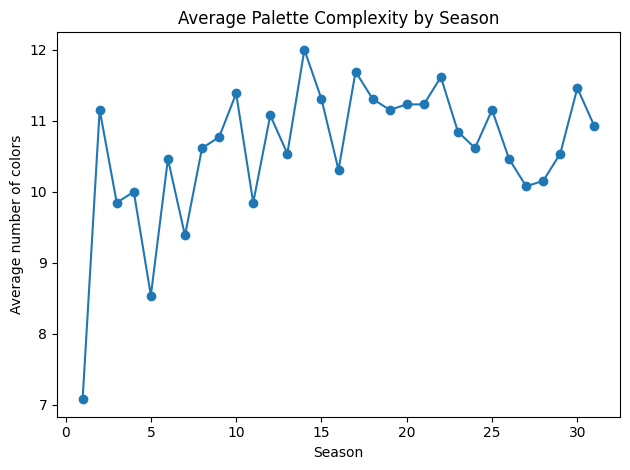

In [ ]:
# Plot average palette complexity by season to observe potential changes over time
plt.figure()
season_mean.plot(marker="o")
plt.xlabel("Season")
plt.ylabel("Average number of colors")
plt.title("Average Palette Complexity by Season")
plt.tight_layout()
plt.show()

Summary: Average palette complexity stabilizes after the initial seasons, with only moderate fluctuations across time. This indicates limited temporal variation in color complexity and suggests that changes in visual structure are incremental rather than driven by season-level shifts.

### 4.2 Does the frequency of use of the core color change with the seasons?

This analysis examines whether the usage frequency of core colors remains stable across seasons. By tracking how often the most frequently used colors appear in each season, we aim to understand whether Bob Ross’s visual style is temporally consistent or whether subtle shifts in palette preferences occur over time. This helps assess whether stylistic consistency is maintained across episodes or gradually evolves throughout the series.

In [ ]:
# Identify core colors based on overall usage frequency
color_usage_rate = bob_ross[color_cols].mean()
core_colors = color_usage_rate[color_usage_rate > 0.7].index

In [ ]:
# Calculate average usage rate of core colors for each season
season_core_usage = (
    bob_ross
    .groupby("season")[core_colors]
    .mean()
    .mean(axis=1)
)

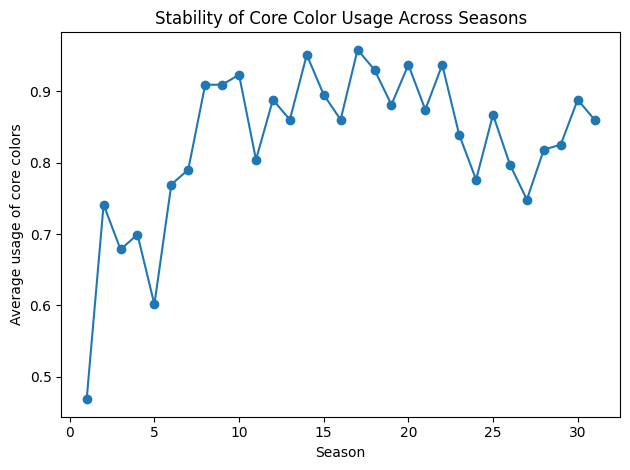

In [ ]:
# Plot how core color usage changes across seasons
plt.figure()
season_core_usage.plot(marker="o")
plt.xlabel("Season")
plt.ylabel("Average usage of core colors")
plt.title("Stability of Core Color Usage Across Seasons")
plt.tight_layout()
plt.show()

Summary: The usage of core colors remains high and relatively stable across seasons, indicating strong stylistic consistency over time.

# **Project M2**

## EDA

### EDA 1: Do Bob Ross paintings follow a small number of distinct color usage patterns based on their reliance on core versus non-core colors?

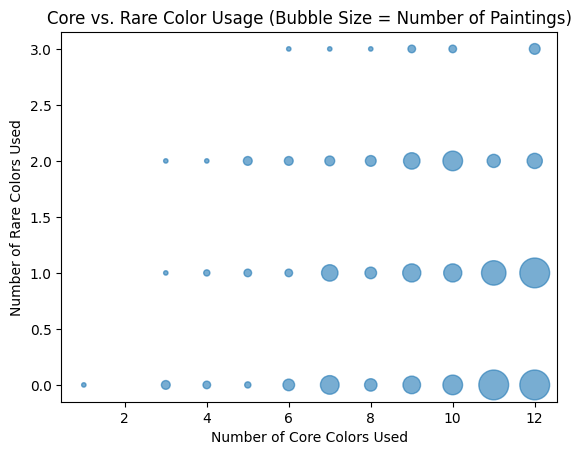

In [ ]:
# Compute the number of core colors used in each painting
bob_ross["num_core_colors"] = bob_ross["num_colors"] - bob_ross["num_rare_colors"]

# Count how many paintings fall into each combination of (number of core colors, number of rare colors)
count_df = (
    bob_ross
    .groupby(["num_core_colors", "num_rare_colors"])
    .size()
    .reset_index(name="count")
)

# Create a bubble plot
plt.scatter(
    count_df["num_core_colors"],
    count_df["num_rare_colors"],
    s=count_df["count"] * 10,
    alpha=0.6
)

plt.xlabel("Number of Core Colors Used")
plt.ylabel("Number of Rare Colors Used")
plt.title("Core vs. Rare Color Usage (Bubble Size = Number of Paintings)")
plt.show()

The bubble plot shows that paintings concentrate around a small number of core-rare color usage combinations. This suggests that Bob Ross's paintings follow a few common color usage patterns, supporting the idea that they can be grouped into a small number of visual style types.

### EDA 2: Does the distribution of palette size differ across seasons, or does it remain stable over time?

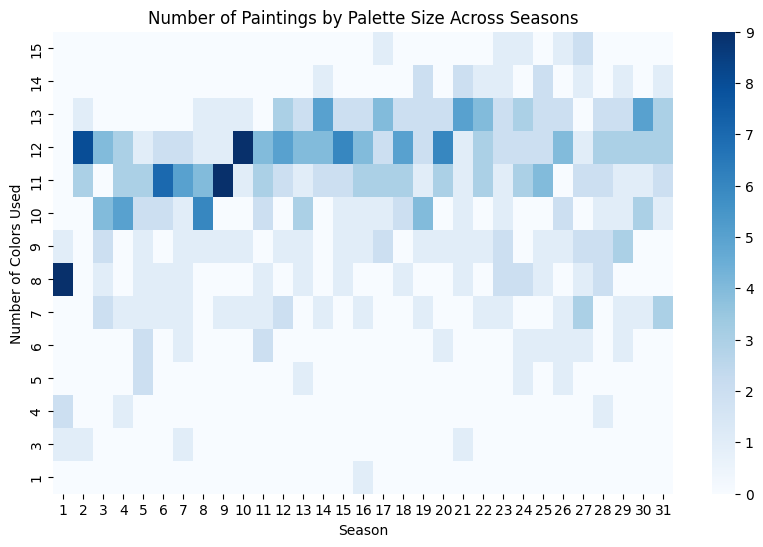

In [ ]:
import seaborn as sns

# Count the number of paintings for each combination of season and palette size (number of colors used)
count_table = (
    bob_ross
    .groupby(["season", "num_colors"])
    .size()
    .reset_index(name="num_paintings")
)

# Pivot the table into a matrix
heatmap_data = count_table.pivot(
    index="num_colors",
    columns="season",
    values="num_paintings"
).fillna(0)

# Sort palette size from smallest to largest for easier interpretation
heatmap_data = heatmap_data.sort_index(ascending=False)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="Blues")
plt.xlabel("Season")
plt.ylabel("Number of Colors Used")
plt.title("Number of Paintings by Palette Size Across Seasons")
plt.show()

The heatmap shows that the distribution of palette size is highly consistent across seasons. Across all seasons, most paintings consistently use about 10-13 colors, with very few paintings using fewer than 6 or more than 15 colors. This stable distribution across seasons suggests that palette size is not strongly influenced by season.

### EDA 3: Do Bob Ross’s color usage patterns change across seasons?

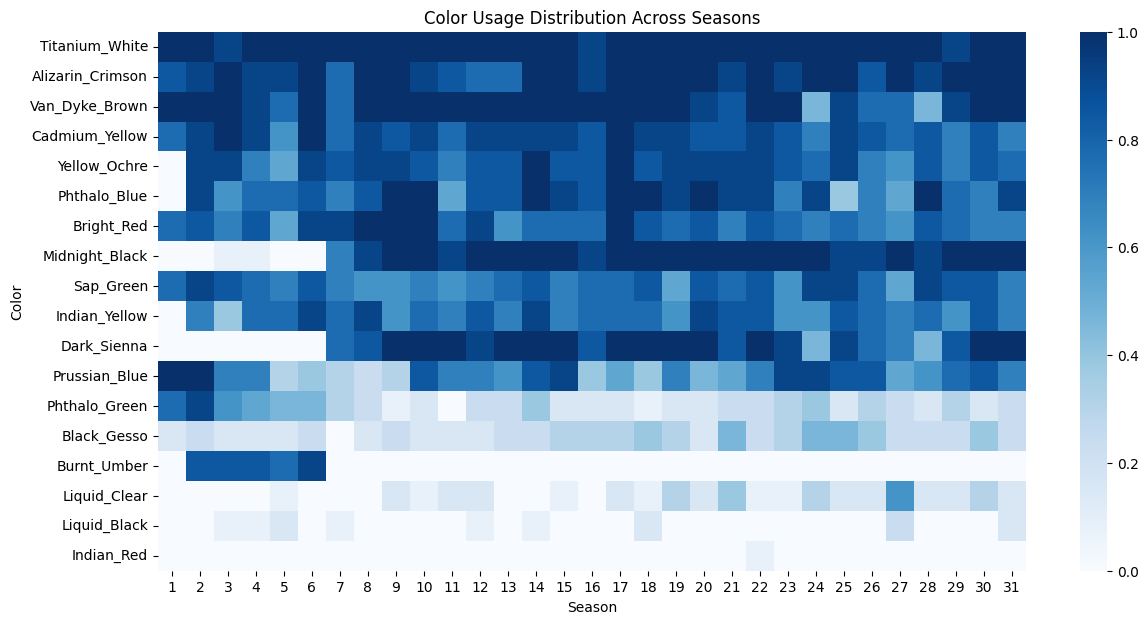

In [ ]:
# Select all binary color indicator columns
color_cols = bob_ross.select_dtypes("bool").columns

# Compute the proportion of paintings using each color in each season
season_color_rate = bob_ross.groupby("season")[color_cols].mean()

# Order colors by their overall usage frequency
color_order = bob_ross[color_cols].mean().sort_values(ascending=False).index
season_color_rate = season_color_rate[color_order]

heatmap_data = season_color_rate.T

# Plot the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap="Blues")
plt.xlabel("Season")
plt.ylabel("Color")
plt.title("Color Usage Distribution Across Seasons")
plt.show()

The heatmap shows that color usage is largely stable across seasons, with a small set of core colors dominating throughout the series. At the same time, starting around Season 7, the use of Burnt Umber declines, while Dark Sienna and Midnight Black become more prominent, indicating a subtle substitution among darker tones.

## Unsupervised and Unstructured Analysis

### K-means Clustering Based on Color Usage Patterns

#### Variant A: Full Color Presence

Step 1: Prepare full binary color feature matrix

In [ ]:
# Select all binary color indicator columns
color_cols = bob_ross.select_dtypes("bool").columns

# Convert boolean values to integers
X_full = bob_ross[color_cols].astype(int)

Step 2: Explore different numbers of clusters

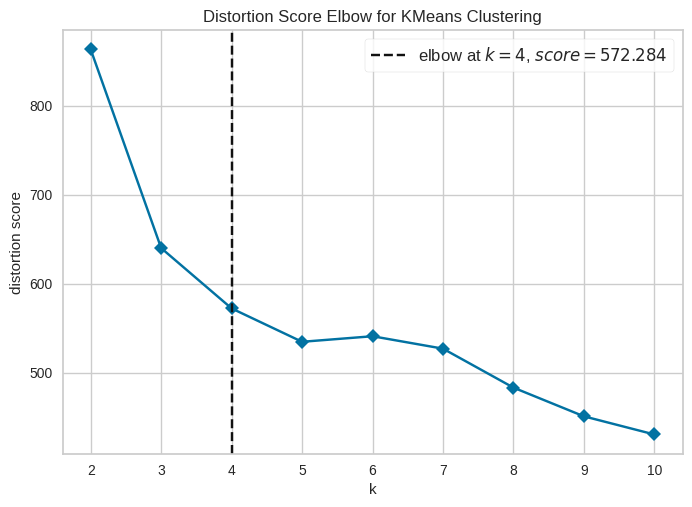

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    clustering, k=(2, 11), metric='distortion', timings=False, random_state=42
)

visualizer.fit(X_full)
visualizer.show()

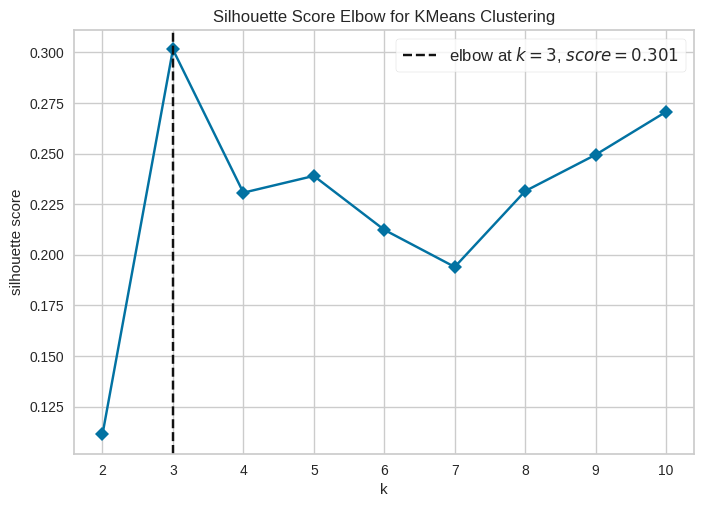

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    clustering, k=(2, 11), metric='silhouette', timings=False, random_state=42
)

visualizer.fit(X_full)
visualizer.show()

Plot the *Silhuette plot*

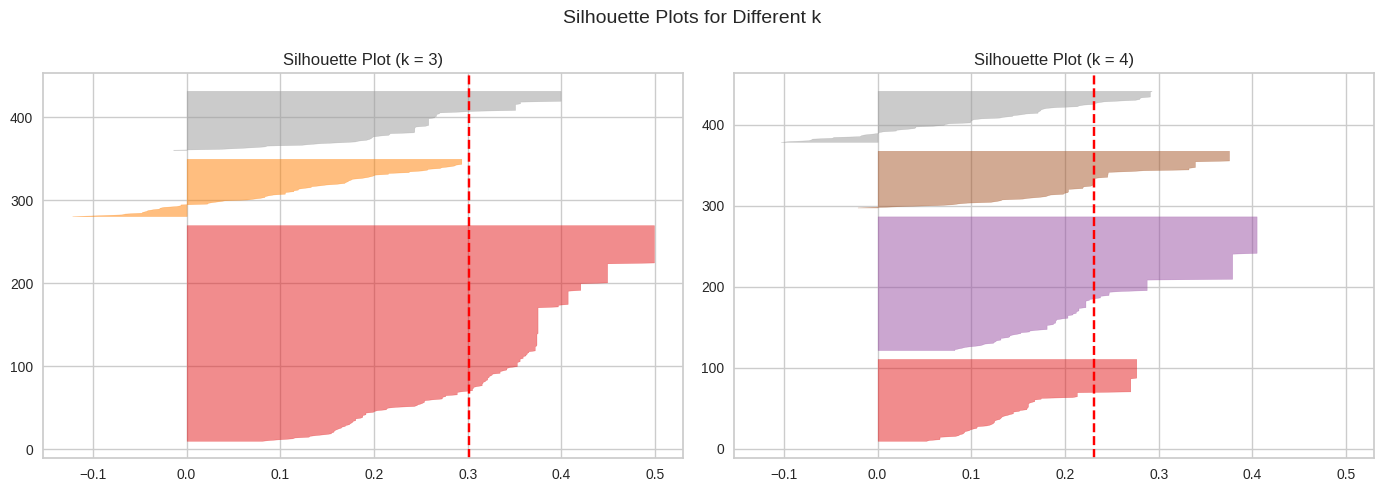

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# k = 3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
viz_3 = SilhouetteVisualizer(
    kmeans_3,
    timings=False,
    ax=axes[0]
)
viz_3.fit(X_full)
axes[0].set_title("Silhouette Plot (k = 3)")

# k = 4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
viz_4 = SilhouetteVisualizer(
    kmeans_4,
    timings=False,
    ax=axes[1]
)
viz_4.fit(X_full)
axes[1].set_title("Silhouette Plot (k = 4)")

plt.suptitle("Silhouette Plots for Different k", fontsize=14)
plt.tight_layout()
plt.show()

Although k = 3 achieves a slightly higher average silhouette score, k = 4 provides more balanced and interpretable clusters with clearer separation and fewer borderline assignments.

Step 3: Fit final KMeans model

In [ ]:
# Choose final number of clusters (k = 4)
final_k = 4

kmeans_full = KMeans(
    n_clusters=final_k,
    n_init=20,
    random_state=42
)

bob_ross["cluster_full_colors"] = kmeans_full.fit_predict(X_full)

# Check cluster sizes
bob_ross["cluster_full_colors"].value_counts()

,count
cluster_full_colors,
3,166
1,102
2,70
0,65


In terms of size, the clusters are not evenly distributed. Cluster 3 is the largest group, containing 166 paintings, suggesting that this color combination represents the most common or “default” style in Bob Ross’s work. Cluster 1 follows with 102 paintings, indicating a secondary but still substantial style pattern. Clusters 2 and 0 are smaller, with 70 and 65 paintings respectively, reflecting more specialized or less frequently used color combinations.

Step 4: Inspect cluster-level color usage patterns

In [ ]:
# Average color usage within each cluster
cluster_profiles = (
    bob_ross
    .groupby("cluster_full_colors")[color_cols]
    .mean()
)

cluster_profiles.head()

,Black_Gesso,Bright_Red,Burnt_Umber,Cadmium_Yellow,Dark_Sienna,Indian_Red,Indian_Yellow,Liquid_Black,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
cluster_full_colors,,,,,,,,,,,,,,,,,,
0,0.261538,0.230769,0.030769,0.261538,0.584615,0.000000,0.107692,0.046154,0.169231,0.769231,0.584615,0.123077,0.753846,0.169231,0.969231,0.738462,0.169231,0.738462
1,0.343137,0.882353,0.000000,0.950980,0.892157,0.000000,0.862745,0.019608,0.127451,0.980392,0.931373,0.098039,0.000000,0.764706,1.000000,0.901961,0.950980,0.960784
2,0.171429,0.857143,0.757143,0.971429,0.000000,0.000000,0.657143,0.028571,0.000000,0.014286,0.714286,0.685714,0.685714,0.928571,0.985714,1.000000,0.771429,1.000000
3,0.222892,0.939759,0.000000,0.987952,0.969880,0.006024,0.909639,0.042169,0.162651,1.000000,0.843373,0.301205,1.000000,0.915663,1.000000,0.969880,0.993976,0.987952


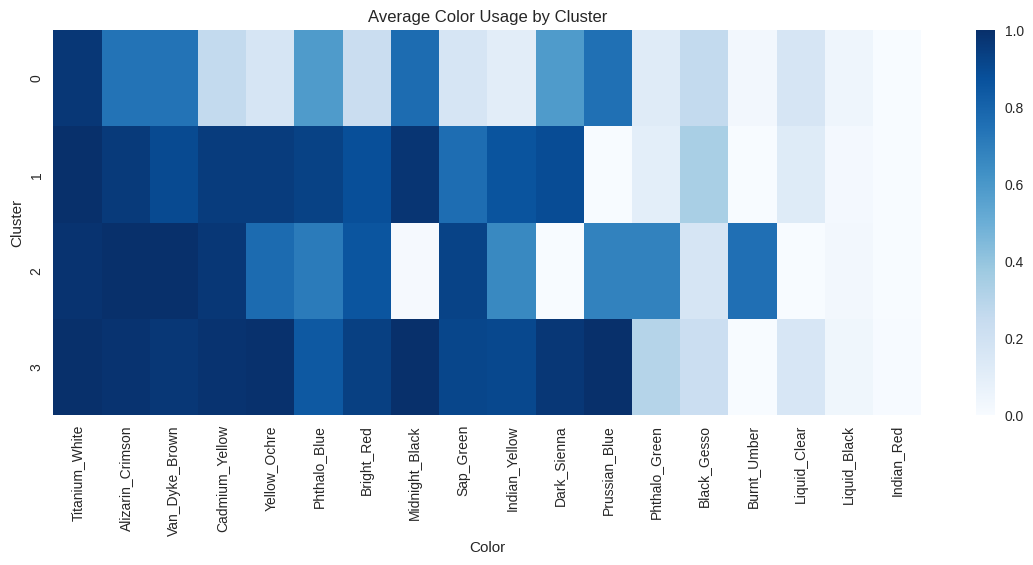

In [ ]:
# Cluster-level Color Usage Heatmap

# Compute average color usage within each cluster
cluster_profiles = (
    bob_ross
    .groupby("cluster_full_colors")[color_cols]
    .mean()
)

# Order colors by overall usage frequency to improve readability
color_order = (
    bob_ross[color_cols]
    .mean()
    .sort_values(ascending=False)
    .index
)

cluster_profiles = cluster_profiles[color_order]

# Plot a heatmap to visualize color usage patterns by cluster
plt.figure(figsize=(14, 5))
sns.heatmap(cluster_profiles, cmap="Blues")
plt.xlabel("Color")
plt.ylabel("Cluster")
plt.title("Average Color Usage by Cluster")
plt.show()

**Interpretation**

All four clusters rely heavily on Titanium White, confirming that Bob Ross’s paintings share a strong and stable core palette. Differences across clusters arise from how secondary colors are combined rather than from entirely different color sets.

Clusters 1 and 3 show higher usage of darker tones such as Midnight Black, Dark Sienna, and Indian Yellow. Cluster 2 relies less on these dark colors and makes greater use of cooler tones like Prussian Blue, resulting in a brighter overall appearance. Cluster 0 exhibits a more balanced use of core colors and can be viewed as a representative baseline style.

Rare colors (e.g., Liquid Clear, Liquid Black, Indian Red) appear infrequently across all clusters, indicating that stylistic variation primarily occurs through different combinations of common colors rather than through the introduction of unusual pigments.

#### Variant B: Top-N most frequent colors

Step 1: Select Top-N most frequently used colors

In [ ]:
# Compute overall usage frequency for each color
color_freq = X_full.mean().sort_values(ascending=False)

# Select the top N most frequently used colors
topN = 10
top_colors = color_freq.head(topN).index
X_topN = X_full[top_colors]

Step 2: Explore different numbers of clusters

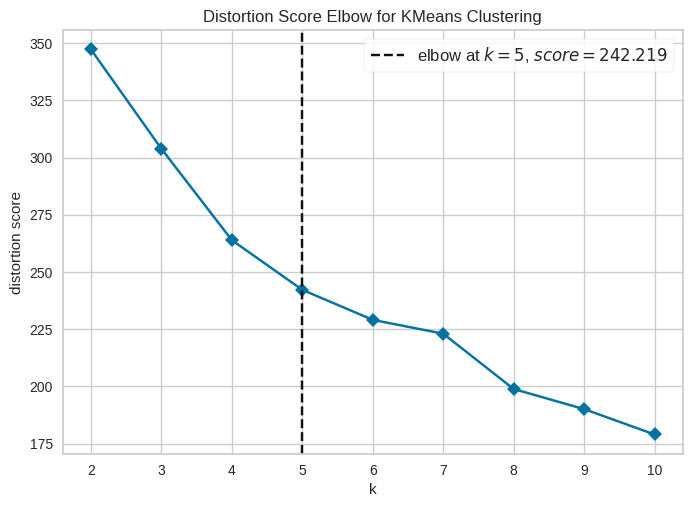

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    clustering, k=(2, 11), metric='distortion', timings=False, random_state=42
)

visualizer.fit(X_topN)
visualizer.show()

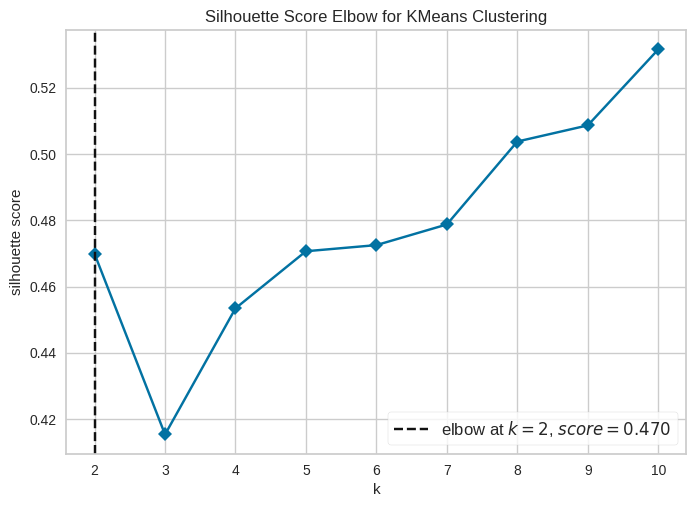

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    clustering, k=(2, 11), metric='silhouette', timings=False, random_state=42
)

visualizer.fit(X_topN)
visualizer.show()

Plot the *Silhuette plot*

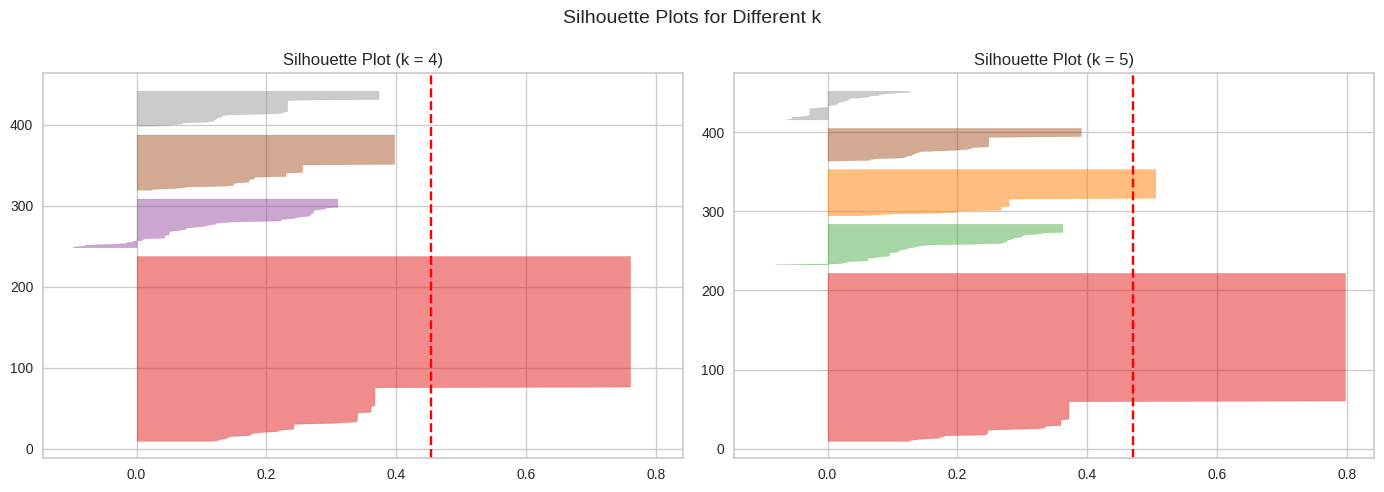

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# k = 4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
viz_4 = SilhouetteVisualizer(
    kmeans_4,
    timings=False,
    ax=axes[0]
)
viz_4.fit(X_topN)
axes[0].set_title("Silhouette Plot (k = 4)")

# k = 5
kmeans_5 = KMeans(n_clusters=5, random_state=42)
viz_5 = SilhouetteVisualizer(
    kmeans_5,
    timings=False,
    ax=axes[1]
)
viz_5.fit(X_topN)
axes[1].set_title("Silhouette Plot (k = 5)")

plt.suptitle("Silhouette Plots for Different k", fontsize=14)
plt.tight_layout()
plt.show()

Although k = 5 achieves a slightly higher average silhouette score, it introduces a less cohesive cluster with many low silhouette values. The k = 4 solution provides more balanced and interpretable clusters, making it a better choice for identifying a small number of dominant visual style types.

Step 3: Fit final KMeans model

In [ ]:
# Choose final number of clusters (k = 4)
final_k = 4

kmeans_topN = KMeans(
    n_clusters=final_k,
    n_init=20,
    random_state=42
)

bob_ross["cluster_topN_colors"] = kmeans_topN.fit_predict(X_topN)

# Check cluster sizes
bob_ross["cluster_topN_colors"].value_counts()

,count
cluster_topN_colors,
0,229
2,69
1,61
3,44


Under Variant B, cluster sizes are highly imbalanced. Cluster 0 contains 229 paintings, indicating a dominant, baseline style built around common color combinations. The remaining clusters are much smaller, reflecting less frequent but still structured variations in how core colors are emphasized. This imbalance suggests that Bob Ross’s paintings are largely centered around a single consistent style, with a few recurring alternative sub-styles.

Step 4: Inspect cluster-level color usage patterns

In [ ]:
# Compute average usage of top-N colors within each cluster
cluster_profiles_topN = (
    bob_ross
    .groupby("cluster_topN_colors")[top_colors]
    .mean()
)

cluster_profiles_topN

,Titanium_White,Alizarin_Crimson,Van_Dyke_Brown,Cadmium_Yellow,Yellow_Ochre,Phthalo_Blue,Bright_Red,Midnight_Black,Sap_Green,Indian_Yellow
cluster_topN_colors,,,,,,,,,,
0,1.000000,0.978166,0.938865,0.986900,0.986900,0.868996,0.930131,1.000000,1.000000,0.934498
1,0.967213,0.770492,0.737705,0.229508,0.114754,0.590164,0.196721,0.754098,0.196721,0.098361
2,0.985507,0.985507,0.971014,0.971014,0.811594,0.710145,0.855072,0.000000,0.942029,0.710145
3,1.000000,0.931818,1.000000,0.886364,0.863636,0.886364,0.840909,0.954545,0.000000,0.522727


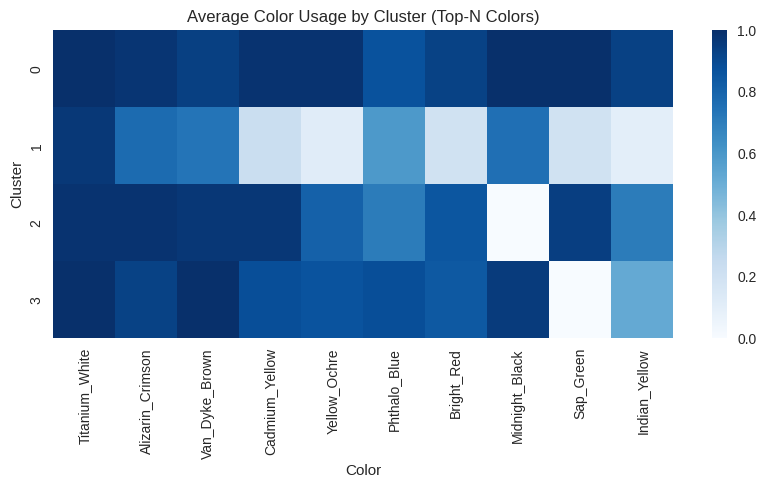

In [ ]:
# Cluster-level Color Usage Heatmap

# Compute average usage of top-N colors within each cluster
cluster_profiles_topN = (
    bob_ross
    .groupby("cluster_topN_colors")[top_colors]
    .mean()
)

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(cluster_profiles_topN, cmap="Blues")

plt.xlabel("Color")
plt.ylabel("Cluster")
plt.title("Average Color Usage by Cluster (Top-N Colors)")
plt.show()

All clusters show very high usage of Titanium White, confirming it as a universal core color across Bob Ross’s paintings. Differences between clusters emerge in the relative emphasis on secondary colors.

Cluster 0 relies heavily on a broad set of core colors, including Van Dyke Brown, Cadmium Yellow, Yellow Ochre, Bright Red, and Midnight Black. This pattern represents the dominant Bob Ross style, characterized by a rich but balanced palette.

Cluster 3 shows a similar broad use of core colors, suggesting a related but less common variation of this baseline style.

Cluster 2 stands out by using little to no Midnight Black while maintaining strong use of other core colors, resulting in a noticeably lighter or less contrast-heavy appearance.

Cluster 1 shows consistently lower usage rates across several core colors, reflecting a more restrained or simplified palette.

#### Variant C: Aggregated features

Step 1: Build aggregated feature matrix and Standardize features

In [ ]:
from sklearn.preprocessing import StandardScaler

X_agg = bob_ross[["num_colors", "num_rare_colors"]].copy()
X_agg["num_core_colors"] = X_agg["num_colors"] - X_agg["num_rare_colors"]

# Standardize features
scaler = StandardScaler()
X_agg_scaled = scaler.fit_transform(X_agg)

Step 2: Explore different numbers of clusters

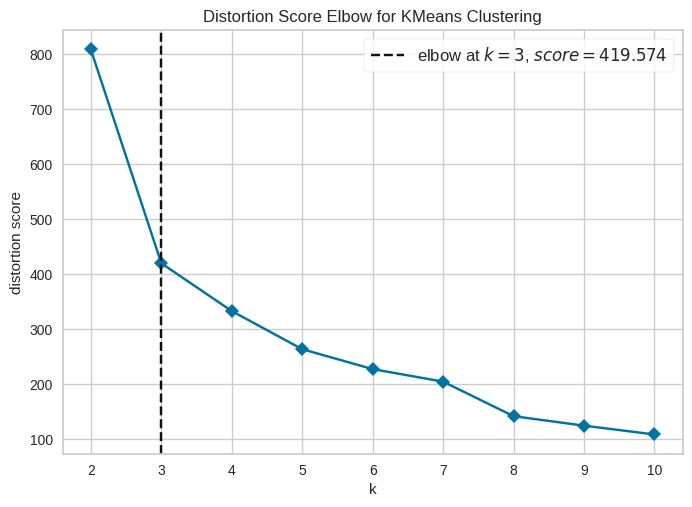

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    clustering, k=(2, 11), metric='distortion', timings=False, random_state=42
)

visualizer.fit(X_agg_scaled)
visualizer.show()

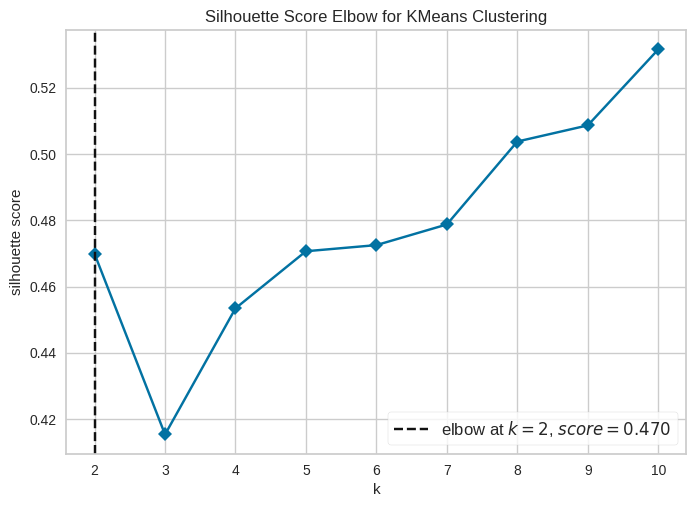

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    clustering, k=(2, 11), metric='silhouette', timings=False, random_state=42
)

visualizer.fit(X_topN)
visualizer.show()

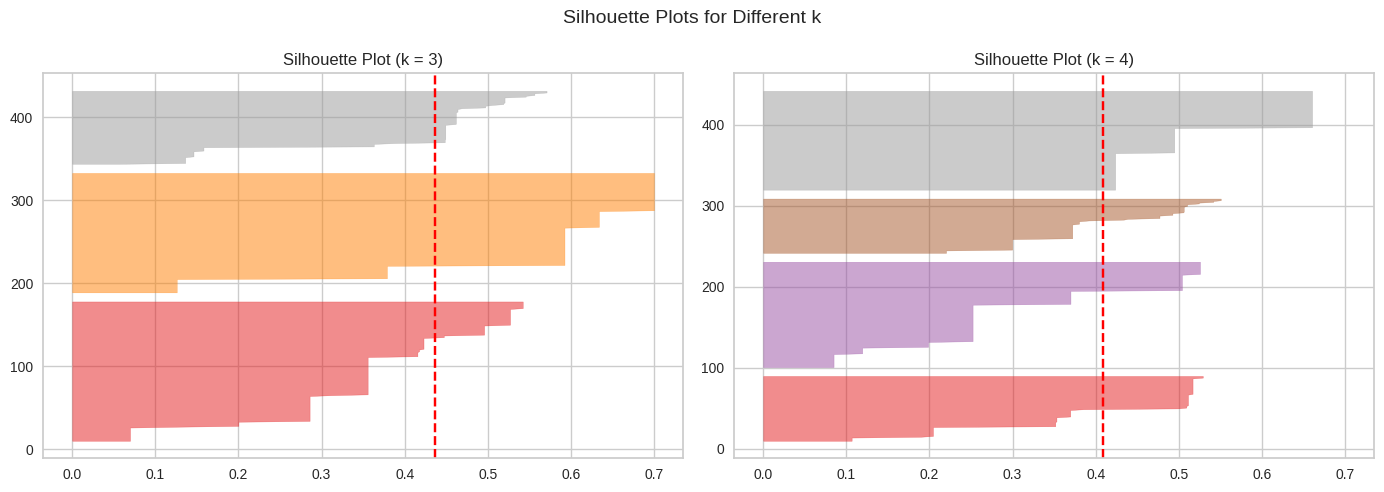

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# k = 3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
viz_3 = SilhouetteVisualizer(
    kmeans_3,
    timings=False,
    ax=axes[0]
)
viz_3.fit(X_agg_scaled)
axes[0].set_title("Silhouette Plot (k = 3)")

# k = 4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
viz_4 = SilhouetteVisualizer(
    kmeans_4,
    timings=False,
    ax=axes[1]
)
viz_4.fit(X_agg_scaled)
axes[1].set_title("Silhouette Plot (k = 4)")

plt.suptitle("Silhouette Plots for Different k", fontsize=14)
plt.tight_layout()
plt.show()

Although k = 3 yields a marginally higher average silhouette score, k = 4 better captures meaningful stylistic variation without over-fragmenting the data, making it more suitable for identifying distinct visual style types.

Step 3: Fit final KMeans model

In [ ]:
# Choose final number of clusters (k = 4)
final_k = 4

kmeans_agg = KMeans(n_clusters=final_k, n_init=20, random_state=42)
bob_ross["cluster_agg"] = kmeans_agg.fit_predict(X_agg_scaled)

bob_ross["cluster_agg"].value_counts()

,count
cluster_agg,
0,128
3,104
1,99
2,72


For Variant C, the cluster sizes are also uneven. Cluster 0 is the largest group with 128 paintings, indicating that a moderate-to-large core palette represents the most typical palette structure. Clusters 3 and 1 follow with 104 and 99 paintings, suggesting two additional common patterns that differ mainly in overall palette size and use of rare colors. Cluster 2 is the smallest with 72 paintings, reflecting a less frequently used, more specialized palette structure.

Step 4: Inspect cluster-level color usage patterns

In [ ]:
cluster_profile_agg = (
    bob_ross
    .groupby("cluster_agg")[["num_core_colors", "num_rare_colors", "num_colors"]]
    .mean()
)

cluster_profile_agg

,num_core_colors,num_rare_colors,num_colors
cluster_agg,,,
0,10.953125,0.000000,10.953125
1,8.989899,1.676768,10.666667
2,6.055556,0.486111,6.541667
3,11.615385,1.317308,12.932692


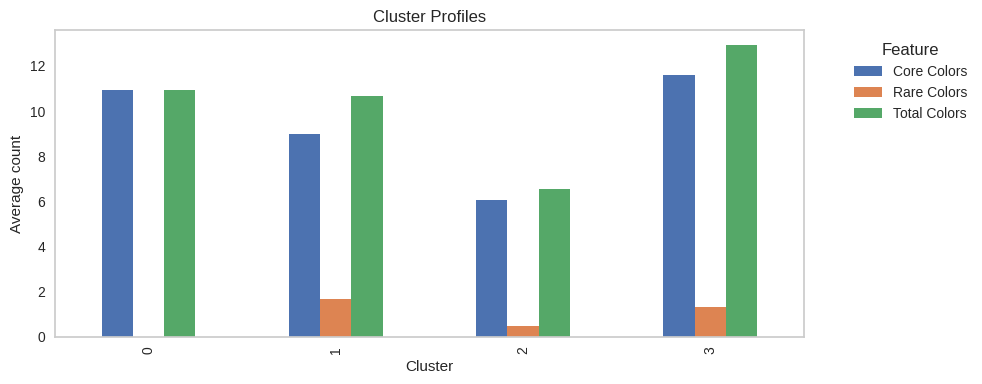

In [ ]:
# cluster profile bar chart
cluster_profile_agg.plot(
    kind="bar",
    figsize=(10, 4),
    color=["#4C72B0", "#DD8452", "#55A868"]
)

plt.xlabel("Cluster")
plt.ylabel("Average count")
plt.title("Cluster Profiles")
plt.legend(
    title="Feature",
    labels=["Core Colors", "Rare Colors", "Total Colors"],
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.grid(False)

plt.tight_layout()
plt.show()

**Interpretation**

The cluster profiles show clear differences in palette structure across the four style types, as well as in how frequently each structure appears.

Cluster 2 uses the smallest palettes overall, relying on relatively few core colors and almost no rare colors, and is also the least common group with 72 paintings.

Cluster 1 uses a moderate number of core colors and incorporates the highest average number of rare colors; with 99 paintings, it represents a meaningful but less dominant palette structure.

Clusters 0 and 3 use larger palettes dominated by core colors. Cluster 0 is the most common structure with 128 paintings, indicating a widely used, balanced palette, while Cluster 3 follows with 104 paintings incorporates slightly more rare colors.

Overall, variation across clusters is driven primarily by differences in the number of core colors used, with rare colors playing a secondary but distinguishing role, and the cluster sizes highlight which palette structures are most typical in Bob Ross’s work.

### Outlier Analysis

Outlier detection is based on Variant B because it preserves detailed color usage patterns, while Variant C is used to interpret and summarize how outliers differ from typical paintings.

#### Using variant B & k = 4 to identify outliers

In [ ]:
# Fit KMeans (using variant B & k = 4)
k = 4
kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
labels = kmeans.fit_predict(X_topN)

# Save cluster labels
bob_ross["cluster"] = labels

In [ ]:
# Compute distance to assigned cluster center

# Get cluster centers
centers = kmeans.cluster_centers_

# Distance from each point to its own cluster center
distances = np.linalg.norm(
    X_topN - centers[labels],
    axis=1
)

bob_ross["distance_to_center"] = distances

In [ ]:
# Define outlier threshold (top 5%)
threshold = np.percentile(distances, 95)

bob_ross["is_outlier"] = bob_ross["distance_to_center"] > threshold

bob_ross["is_outlier"].value_counts()

,count
is_outlier,
False,382
True,21


In [ ]:
# Display paintings identified as outliers
outliers = bob_ross[bob_ross["is_outlier"]].sort_values(
    "distance_to_center", ascending=False
)

outliers.head(3)

,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,...,Alizarin_Crimson,num_rare_colors,rare_color_ratio,num_core_colors,cluster_full_colors,cluster_topN_colors,cluster_agg,cluster,distance_to_center,is_outlier
63,241,https://www.twoinchbrush.com/images/painting24...,Indian Girl,5,12,5,https://www.youtube.com/embed/2uXMx8Kjs8I,"['Bright Red', 'Burnt Umber', 'Indian Yellow',...","['#DB0000', '#8A3324', '#FFB800', '#021E44', '...",False,...,False,1,0.200000,4,0,1,2,1,1.902275,True
373,382,https://www.twoinchbrush.com/images/painting38...,Pot O' Posies,29,10,6,https://www.youtube.com/embed/2zv_S_uVoVQ,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#000000', '...",True,...,True,1,0.166667,5,0,1,2,1,1.818564,True
313,322,https://www.twoinchbrush.com/images/painting32...,Enchanted Falls Oval,25,2,6,https://www.youtube.com/embed/HklPkQ0lSKA,"['Alizarin Crimson', 'Black Gesso', 'Indian Ye...","['#4E1500', '#000000', '#FFB800', '#0A3410', '...",True,...,True,1,0.166667,5,0,2,2,2,1.801246,True


In [ ]:
# Calculate the proportion of outlier paintings in each cluster
outliers["cluster"].value_counts(normalize=True)

,proportion
cluster,
1,0.619048
2,0.238095
0,0.095238
3,0.047619


**Interpretation**

Outlier paintings are not evenly distributed across clusters. Cluster 1 contains the majority of outliers, accounting for about 62% of all identified outlier paintings, indicating that this style group shows the greatest internal variation. This cluster is characterized by a more restrained palette with lower usage of several core colors, which may make it more sensitive to small deviations in color combinations and therefore more likely to produce outliers.

Clusters 0 and 2 together account for roughly one-third of outliers. Cluster 0 represents the dominant, balanced core style, so its outliers likely reflect occasional departures from an otherwise stable baseline. Cluster 2, which relies less on darker tones such as Midnight Black, appears to allow variation along a different stylistic dimension, leading to some but not excessive outliers.

In contrast, Cluster 3 contains very few outliers (about 5%), reinforcing that it represents the most typical and stable style in Bob Ross’s work. Its consistent use of a broad set of core colors leaves less room for paintings to deviate strongly from the cluster norm.

In [ ]:
# Average usage of Top-N colors for outliers vs non-outliers
color_usage_compare = (
    bob_ross
    .groupby("is_outlier")[top_colors]
    .mean()
    .T
)

color_usage_compare.columns = ["Non-outliers", "Outliers"]
color_usage_compare

,Non-outliers,Outliers
Titanium_White,1.000000,0.857143
Alizarin_Crimson,0.963351,0.571429
Van_Dyke_Brown,0.947644,0.428571
Cadmium_Yellow,0.871728,0.619048
Yellow_Ochre,0.835079,0.380952
Phthalo_Blue,0.829843,0.285714
Bright_Red,0.816754,0.428571
Midnight_Black,0.808901,0.380952
Sap_Green,0.777487,0.428571
Indian_Yellow,0.732984,0.571429


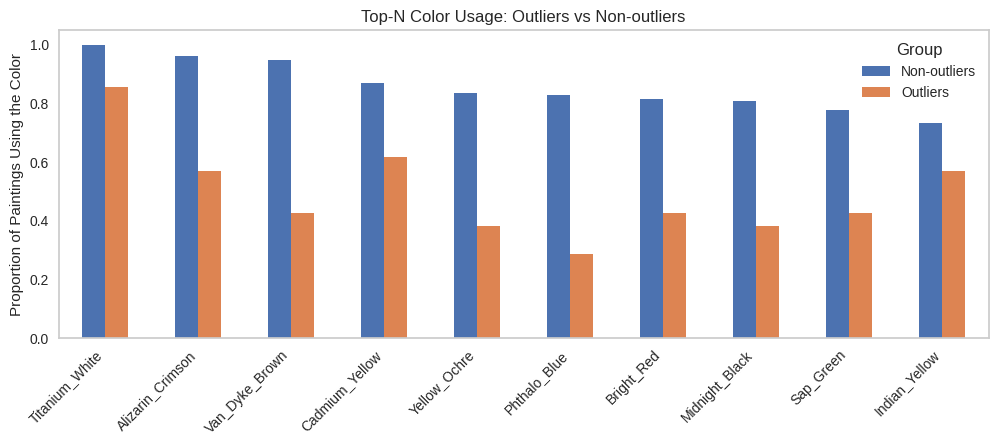

In [ ]:
# Compare average usage rates of Top-N colors between outlier and non-outlier paintings
color_usage_compare.plot(
    kind="bar",
    figsize=(12, 4),
    color=["#4C72B0", "#DD8452"]
)

plt.ylabel("Proportion of Paintings Using the Color")
plt.title("Top-N Color Usage: Outliers vs Non-outliers")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Group")
plt.grid(False)
plt.show()

**Interpretation**

Outlier paintings consistently show lower usage rates across nearly all top-10 colors compared to non-outliers. The largest gaps appear for Van Dyke Brown, Phthalo Blue, and Midnight Black, where outliers rely much less on these commonly co-occurring core colors. In contrast, colors such as Titanium White remain widely used even among outliers.

Overall, this pattern suggests that outliers depart from the dominant style primarily by weakening the core color structure.

#### Using Variant C to Interpret Outlier Palette Structure

In [ ]:
# Compare average palette structure for outliers vs non-outliers
agg_compare = (
    bob_ross
    .groupby("is_outlier")[["num_colors", "num_core_colors", "num_rare_colors"]]
    .mean()
)

agg_compare.index = ["Non-outliers", "Outliers"]
agg_compare

,num_colors,num_core_colors,num_rare_colors
Non-outliers,10.824607,9.992147,0.832461
Outliers,6.619048,5.666667,0.952381


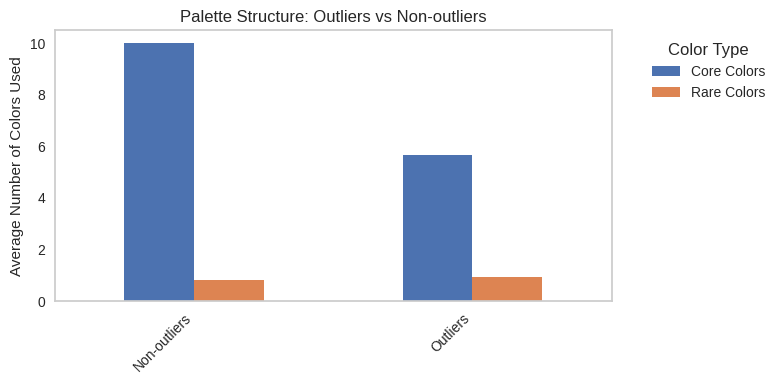

In [ ]:
# Compare the average number of core and rare colors used in outlier vs non-outlier paintings
agg_compare[["num_core_colors", "num_rare_colors"]].plot(
    kind="bar",
    figsize=(8, 4),
    color=["#4C72B0", "#DD8452"]
)

plt.ylabel("Average Number of Colors Used")
plt.title("Palette Structure: Outliers vs Non-outliers")
plt.xticks(rotation=45, ha="right")
plt.legend(
    title="Color Type",
    labels=["Core Colors", "Rare Colors"],
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.grid(False)
plt.tight_layout()
plt.show()

Non-outlier paintings use on average about 10 core colors and fewer than 1 rare color, reflecting a stable and consistent palette structure. In contrast, outlier paintings use fewer core colors (around 6) and slightly more rare colors (around 1). This indicates that outliers deviate primarily by reducing reliance on the core palette and introducing atypical color elements.

**Interpretation**

Non-outlier paintings use on average about 10 core colors, reflecting a stable and well-established palette structure. In contrast, outlier paintings use significantly fewer core colors (around 6), indicating a reduced reliance on the dominant color system. The number of rare colors is slightly higher for outliers (around 1) than for non-outliers (less than 1).

Together with the Top-10 color usage comparison, this suggests that outliers deviate primarily by weakening the core palette structure rather than by substantially expanding the palette or introducing many new colors.

#### Using variant C & k = 4

In [ ]:
# Fit KMeans (using variant C & k = 4)
k = 4
kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
labels = kmeans.fit_predict(X_agg_scaled)

# Save cluster labels
bob_ross["cluster"] = labels

In [ ]:
# Compute distance to assigned cluster center

# Get cluster centers
centers = kmeans.cluster_centers_

# Distance from each painting to its own cluster center
distances = np.linalg.norm(
    X_agg_scaled - centers[labels],
    axis=1
)

bob_ross["distance_to_center"] = distances

In [ ]:
# Define outlier threshold (top 5%)
threshold = np.percentile(distances, 95)

bob_ross["is_outlier"] = bob_ross["distance_to_center"] > threshold
bob_ross["is_outlier"].value_counts()

,count
is_outlier,
False,384
True,19


In [ ]:
# Display paintings identified as outliers
outliers = bob_ross[bob_ross["is_outlier"]].sort_values(
    "distance_to_center", ascending=False
)

outliers.head(3)

,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,...,Alizarin_Crimson,num_rare_colors,rare_color_ratio,num_core_colors,cluster_full_colors,cluster_topN_colors,cluster_agg,cluster,distance_to_center,is_outlier
200,89,https://www.twoinchbrush.com/images/painting89...,Contemplative Lady,16,6,1,https://www.youtube.com/embed/gnp6WE7Ql-s,['Van Dyke Brown'],['#221B15'],False,...,False,0,0.000000,1,1,1,1,1,3.327423,True
54,232,https://www.twoinchbrush.com/images/painting23...,Mountain Blossoms,5,3,5,https://www.youtube.com/embed/UVhhStJAJZc,"['Alizarin Crimson', 'Liquid Black', 'Phthalo ...","['#4E1500', '#000000', '#0C0040', '#102E3C', '...",False,...,True,2,0.400000,3,1,1,1,1,2.258449,True
33,263,https://www.twoinchbrush.com/images/painting26...,Night Light,3,8,9,https://www.youtube.com/embed/l141Y0x8om0,"['Alizarin Crimson', 'Black Gesso', 'Burnt Umb...","['#4E1500', '#000000', '#8A3324', '#FFEC00', '...",True,...,True,3,0.333333,6,0,3,0,0,2.215284,True


In [ ]:
# Calculate the proportion of outlier paintings in each cluster
outliers["cluster"].value_counts(normalize=True)

,proportion
cluster,
1,0.421053
3,0.315789
0,0.263158


In [ ]:
# Compare average palette structure for outliers vs non-outliers
agg_compare = (
    bob_ross
    .groupby("is_outlier")[["num_colors", "num_core_colors", "num_rare_colors"]]
    .mean()
)

agg_compare.index = ["Non-outliers", "Outliers"]
agg_compare

,num_colors,num_core_colors,num_rare_colors
Non-outliers,10.671875,9.890625,0.78125
Outliers,9.263158,7.263158,2.00000


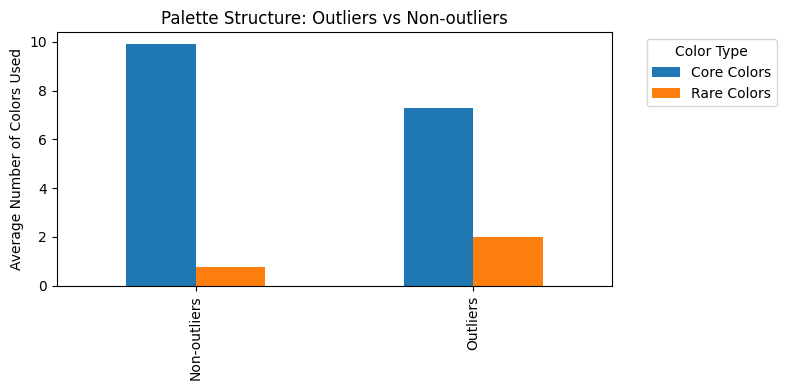

In [ ]:
# Compare the average number of core and rare colors used in outlier vs non-outlier paintings
agg_compare[["num_core_colors", "num_rare_colors"]].plot(
    kind="bar",
    figsize=(8, 4),
)

plt.ylabel("Average Number of Colors Used")
plt.title("Palette Structure: Outliers vs Non-outliers")
plt.legend(
    title="Color Type",
    labels=["Core Colors", "Rare Colors"],
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)
plt.tight_layout()
plt.show()

In [ ]:
# Average usage of Top-N colors for outliers vs non-outliers
color_usage_compare = (
    bob_ross
    .groupby("is_outlier")[top_colors]
    .mean()
    .T
)

color_usage_compare.columns = ["Non-outliers", "Outliers"]
color_usage_compare

,Non-outliers,Outliers
Titanium_White,0.994792,0.947368
Alizarin_Crimson,0.953125,0.736842
Van_Dyke_Brown,0.929688,0.736842
Cadmium_Yellow,0.869792,0.631579
Yellow_Ochre,0.825521,0.526316
Phthalo_Blue,0.809896,0.631579
Bright_Red,0.809896,0.526316
Midnight_Black,0.799479,0.526316
Sap_Green,0.773438,0.473684
Indian_Yellow,0.736979,0.473684


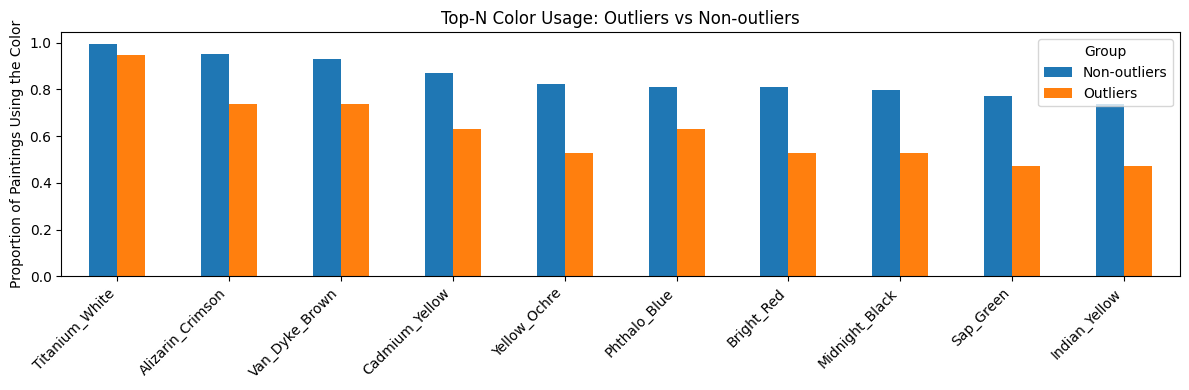

In [ ]:
# Compare average usage rates of Top-N colors between outlier and non-outlier paintings
color_usage_compare.plot(
    kind="bar",
    figsize=(12, 4)
)

plt.ylabel("Proportion of Paintings Using the Color")
plt.title("Top-N Color Usage: Outliers vs Non-outliers")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Group")
plt.tight_layout()
plt.show()